## Data

Nous disposons d'un ensemble de données de 17092 images de cellules normales du sang préphérique, les images sont répartis sur 8 classes de types distincts à savoir : 'basophil','eosinophil', 'erythroblast', 'immature granulocytes', 'lymphocyte', 'monocyte', 'neutrophil' et 'platelet'.

Dans ce notebook on va éffectué un audit général de nos images et quelques visualisation.  

## 1. Charger les données

In [1]:
import pandas as pd
import numpy as np
from termcolor import colored
import random

import glob
import os

import cv2 ## Package pour lire nos images
from PIL import Image ## Importer ce package pour pouvoir voir le format de l'image

import matplotlib.pyplot as plt
%matplotlib inline

## Chemin pour aller récupérer les images stocker dans le dossier 'PBC_dataset_normal_DIB'
path ="C:/Users/HP/Desktop/Projets Data Sciences/20211121-Projet_Deep Learning_Blood_Cell/1."+\
                                               "Prepared Data/PBC_dataset_normal_DIB/PBC_dataset_normal_DIB/"

## Créer une liste où stocker les noms des images de nos 8 différentes classes
Classes = []
for element in os.listdir(path):
    img = os.listdir(path+element)
    Classes.append(img)


# importer toutes les images des 8 différentes classes et les stocker dans un array images
images = []
for element in os.listdir(path) :
    for img in glob.glob(path+element+'/'+'*.jpg'): 
        imge = cv2.imread(img)
        images.append(imge)


## 2. Audit

### 2.1. Regarder la répartitions de nos données sur les 8 classes 

In [2]:
# Afficher la taille de nos classes et le pourcentage de chacune d'entre elle dans un DataFrame
type_cellule=['basophil','eosinophil', 'erythroblast','immature granulocytes','lymphocyte','monocyte','neutrophil',
              'platelet']
Total_Number = []
Percentage = []
for i, Classe in zip(range(len(Classes)),type_cellule):
    Total_Number.append(len(Classes[i]))
    Percentage.append(round(len(Classes[i])/17092 *100,2))

dictionnaire = {'Type de Cellule': [i for i in type_cellule],
                'Total_images' : [j for j in Total_Number],
                '%' : [perc for perc in Percentage]
                 }

DF = pd.DataFrame(data = dictionnaire, columns=dictionnaire.keys())

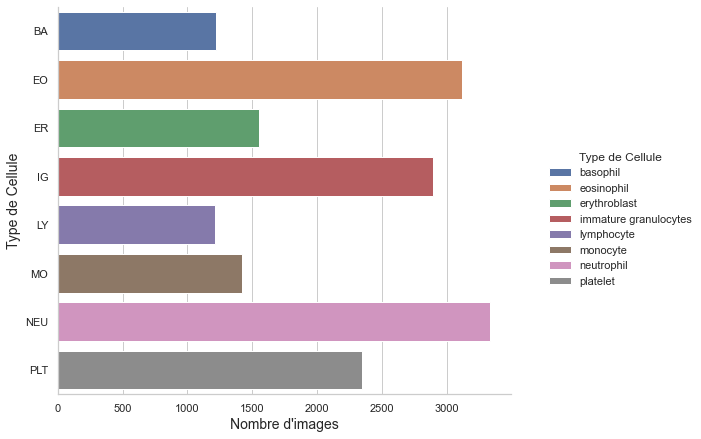

In [3]:
import seaborn as sns
sns.set_theme(style="whitegrid")

g = sns.catplot(y='Type de Cellule',x='Total_images',hue='Type de Cellule' ,data=DF,kind='bar',dodge=False,height=8)
g.fig.set_figwidth(12)
g.fig.set_figheight(6)
g.set_yticklabels(["BA", "EO", "ER","IG","LY","MO","NEU","PLT"])
#plt.legend(labels = [name for name in type_cellule],loc='center right',bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xlabel("Nombre d'images",size=14)
plt.ylabel("Type de Cellule",size=14);

In [4]:
# Taille de nos images
for img in images :
    h, w, c = img.shape # on peut utiliser également size qui nous renvois (h*w*c)
    print("height  :", h)
    print("width   :", w)
    print("channel :", c)

# Si jamais dans nos données on a des images avec des tailles différentes des autres, récupérer le nom des images et le 
# stocker dans une liste !
img_other_size = []    
for element, Classe in zip(os.listdir(path),Classes) :
    for img, imge in zip(glob.glob(path+element+'/'+'*.jpg'), Classe) : 
        if cv2.imread(img).shape != (363,360,3) :
            img_other_size.append(imge)


height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3
height  : 363
width   : 360
channel : 3


In [6]:
print(colored(len(img_other_size),attrs=['bold']),"images possèdent une taille différente de la taille des autres images !")

453 images possèdent une taille différente de la taille des autres images !


In [10]:
## format de nos images
for element in os.listdir(path) :
    for img in glob.glob(path+element+'/'+'*.jpg'): 
        format_image = Image.open(img).format

print("le format de nos images est :", format_image)

# Si il y'a des images avec un format différent des autres images, on va les récupérer et ensuite les stocker dans la liste
# img_other_format        
img_other_format = []

for element, Classe in zip(os.listdir(path),Classes) :
    for img, imge in zip(glob.glob(path+element+'/'+'*.jpg'), Classe) : 
        if Image.open(img).format != 'JPEG' :
            img_other_format.append(imge)


le format de nos images est : JPEG


In [11]:
if not(img_other_format) :
    print(colored("toutes nos images ont le même format !",attrs=['bold']))
else :
    img_other_format

toutes nos images ont le même format !


### 2.2. Visalisation des différents classes de cellules

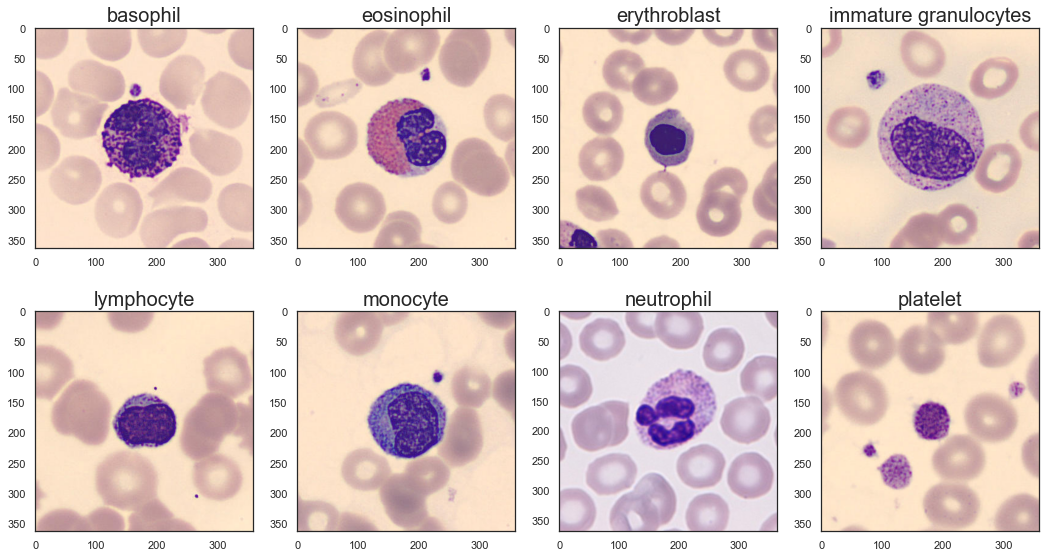

In [12]:
#------- Afficher pour chaque type de cellules une image, qu'on récupére du manière aléatoire ---------#
# selectionner une cellule de chaque type de classe et les visualiser avec plt.imshow
img_random = []
for i in range(len(Classes)) :
    for j in range(1):
        img = random.choice(Classes[i])
        img_random.append(img)


noms_classe = ['basophil','eosinophil','erythroblast','immature granulocytes','lymphocyte','monocyte','neutrophil',
               'platelet']

sns.set_theme(style="white")
fig= plt.figure(figsize=(18,20))   
for i in range(len(img_random)):        
    # subplots
    plt.subplot(4, 4, i+1)   
    # Afficher l'image
    plt.imshow(cv2.cvtColor(cv2.imread(path+os.listdir(path)[i]+'/'+img_random[i],cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB));  
    # set the title to subplots
    plt.gca().set_title(noms_classe[i],size=20) ;
    

### 2.3. Etude des contours avec la méthode Canny

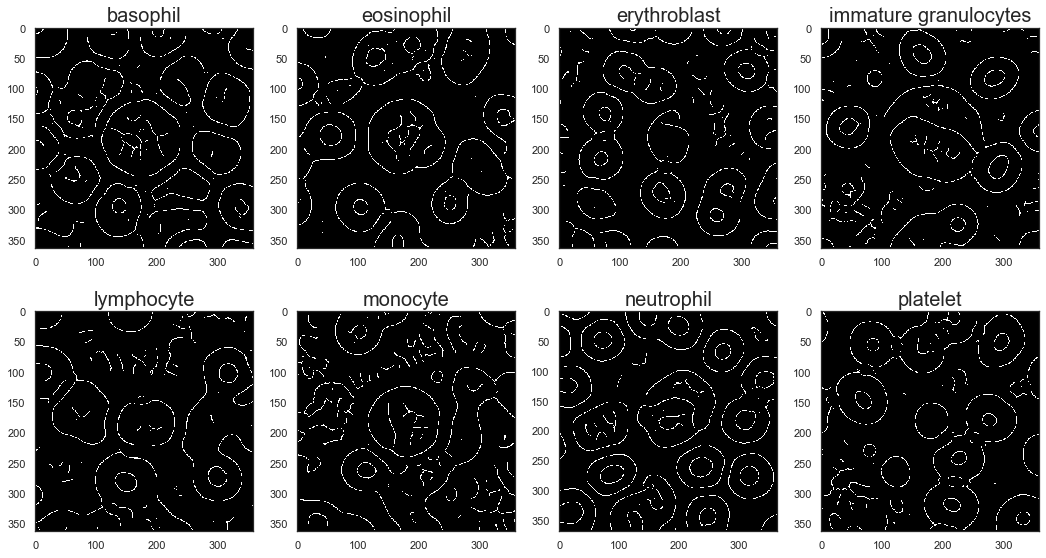

In [13]:
from skimage import feature

# Lire les images afficher la dessus 
imge_array = []
M = []
for i in range(len(img_random)) :
    imge = cv2.imread(path+os.listdir(path)[i]+'/'+img_random[i],cv2.IMREAD_COLOR)#,cv2.IMREAD_COLOR)
    m = np.zeros((imge.shape[0],imge.shape[1]))
    m[:,:] = imge[:,:,0]
    imge_array.append(imge)
    M.append(m)

#---------- Appliquer le filtre Canny  ----------#

edges = []
for i in range(len(imge_array)):
    edges.append(feature.canny(M[i], sigma=8)) # On peut jouer sur les valeur de sigma  

fig = plt.figure(figsize=(18,20))   
for i in range(len(imge_array)) :        
    # subplots
    plt.subplot(4, 4, i+1)   
    # Afficher l'image
    plt.imshow(edges[i], cmap=plt.cm.gray, interpolation='nearest');  
    # set the title to subplots
    plt.gca().set_title(noms_classe[i],size=20) ;

### 2.4. Histogramme des pixels

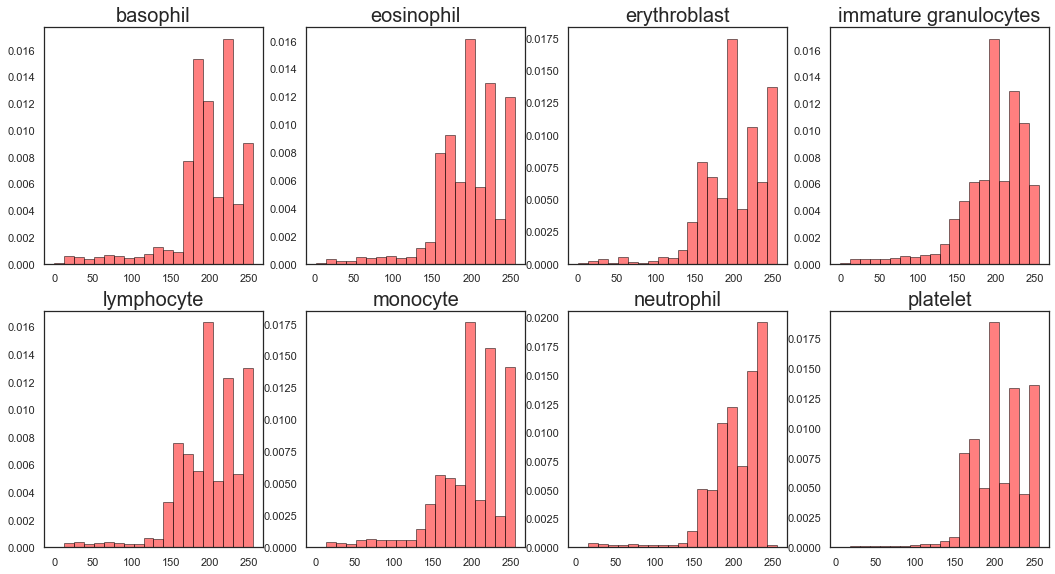

In [14]:
fig = plt.figure(figsize=(18,20))   
for i in range(len(imge_array)) :        
    # subplots
    plt.subplot(4, 4, i+1)   
    # Afficher l'image
    plt.hist(imge_array[i].flatten(), bins = 20, density = True , alpha = .5 , edgecolor = 'black', color = 'red');  
    # set the title to subplots
    plt.gca().set_title(noms_classe[i],size=20) ;

## 3. Nettoyage du Background

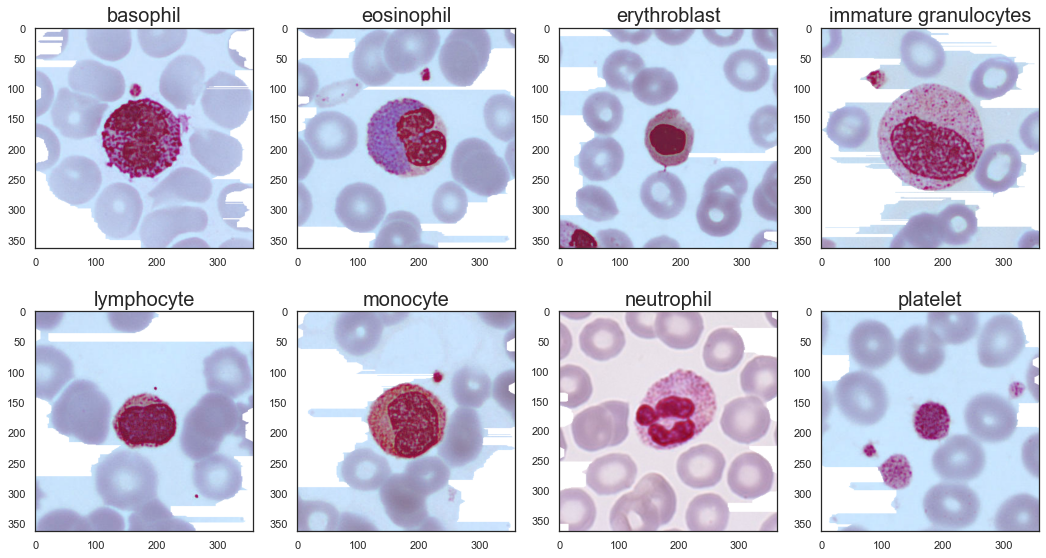

In [15]:
import sys
Results = []
#Masks = []
#Originals = []
for i in range(len(img_random)):
    img = cv2.imread(path+os.listdir(path)[i]+'/'+img_random[i])
    original = img

    l = int(max(5, 6))  #(5, 6)
    u = int(min(6, 6))  #(6, 6)

    ed = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    edges = cv2.GaussianBlur(img, (21, 51), 3) # (21, 51), 3
    edges = cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(edges, l, u)

    _, thresh = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY  + cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)) #(5, 5)
    mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=4)

    data = mask.tolist()
    sys.setrecursionlimit(10**8) #(10**8)
    for i in  range(len(data)):
        for j in  range(len(data[i])):
            if data[i][j] !=  255:
                data[i][j] =  -1
            else:
                break
        for j in  range(len(data[i])-1, -1, -1):
            if data[i][j] !=  255:
                data[i][j] =  -1
            else:
                break
    image = np.array(data)
    image[image !=  -1] =  255
    image[image ==  -1] =  0

    mask = np.array(image, np.uint8)

    result = cv2.bitwise_and(original, original, mask=mask)
    result[mask ==  0] =  255
    Results.append(result)
    
noms_classe = ['basophil','eosinophil','erythroblast','immature granulocytes','lymphocyte','monocyte','neutrophil',
               'platelet']

fig= plt.figure(figsize=(18,20))   
for i in range(len(img_random)):        
    # subplots
    plt.subplot(4, 4, i+1)   
    # Afficher l'image
    plt.imshow(Results[i])
    # set the title to subplots
    plt.gca().set_title(noms_classe[i],size=20) ; 


## 4. Segmenatation en utilisant K-means et Mean Shift

### 4.1.1 K-Means clutering avec OpenCV

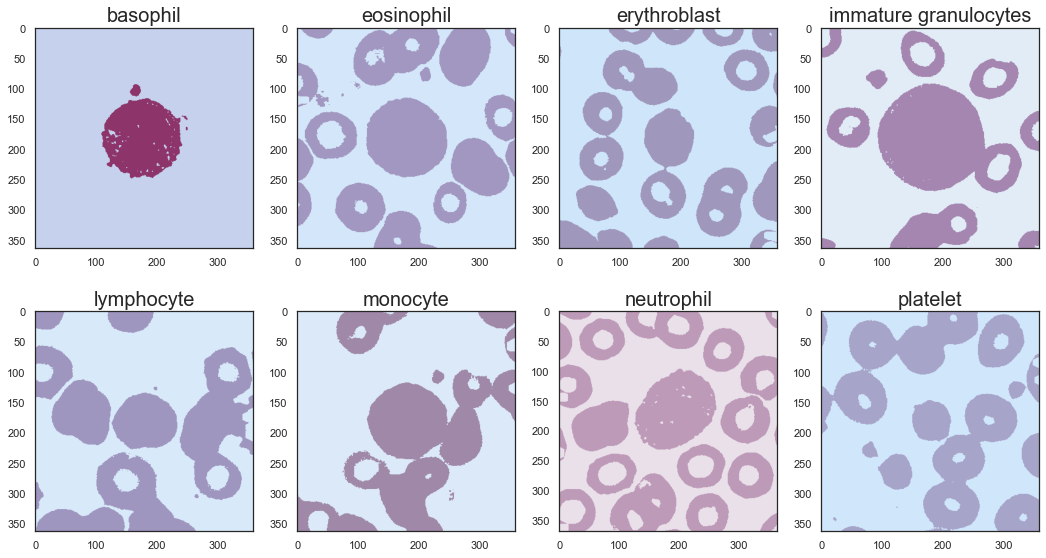

In [16]:
Z = [] ## Créer une liste où stocker nos images redimentionner
Res2 = [] 

for i in range(len(img_random)) :
    img =Results[i] #cv2.imread(path+os.listdir(path)[i]+'/'+img_random[i])
    
    # redimentionner l'image en un array à deux dimension (hauteur*lrgeur,coleur)
    z = img.reshape((-1,3))   
    
    # convertir de le type de l'array en 'float32' afin que les Kmeans de OpenCV le prenne en compte
    z = np.float32(z) 
    Z.append(z)
    # définir les critéres, nombre de clusters (K) et ensuite appliquer les K-Means
    criteria = (cv2.TermCriteria_EPS + cv2.TermCriteria_MAX_ITER, 10, 1.0)
    K = 2 # on met le nombre de clusters = 2 pour juste sortir les cellule
    
    # mettre les sorties de cv2.kmeans dans rets, labels, centroids
    rets , labels , centroids = cv2.kmeans(z, K, None, criteria, 10, cv2.KMEANS_PP_CENTERS)
    #Rets.append(rets)
    #Lables.append(labels)
    #Centroids.append[centroids]
    
    # revenir à la dimensions originale pour pouvoir afficher l'image
    centroids = np.uint8(centroids)
    res = centroids[labels.flatten()]
    res2 = res.reshape((img.shape))
    Res2.append(res2)


noms_classe = ['basophil','eosinophil','erythroblast','immature granulocytes','lymphocyte','monocyte','neutrophil',
               'platelet']

fig= plt.figure(figsize=(18,20))   
for i in range(8):        
    # subplots
    plt.subplot(4, 4, i+1)   
    # Afficher l'image
    #plt.imshow(cv2.cvtColor(cv2.imread(path+os.listdir(path)[i]+'/'+img_random[i],cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB));  
    plt.imshow(Res2[i])
    # set the title to subplots
    plt.gca().set_title(noms_classe[i],size=20) ; 


### 4.2. Segmentation par Mean Shift

## 5. Classification 

### 5.1. Random Forest Classification

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Instancier un modèle Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, bootstrap=True, class_weight=None, criterion='gini',
                                  max_depth=None, max_features='auto', max_leaf_nodes=None,n_jobs=-1)


In [17]:
## Récupérer de chaque type de cellule 80 images
img_random = []
for i in range(len(Classes)) :
    for j in range(80):
        img = random.choice(Classes[i])
        img_random.append(img)               # ERB [IG , MY , MM, PM]LY MO [SNE BNE] PL
        
data = []
for i in range(len(img_random)) :
    if img_random[i][:2] == 'BA' :    
        img = cv2.imread(path+os.listdir(path)[0]+'/'+img_random[i]) 
        data.append(img)
    elif img_random[i][:2] == 'EO' : 
        img = cv2.imread(path+os.listdir(path)[1]+'/'+img_random[i]) 
        data.append(img)
    elif img_random[i][:2] == 'ER' :
        img = cv2.imread(path+os.listdir(path)[2]+'/'+img_random[i]) 
        data.append(img)
    elif (img_random[i][:2] =='IG' or img_random[i][:2] == 'MY' or img_random[i][:2] == 'MM' or img_random[i][:2] == 'PM'):
        img = cv2.imread(path+os.listdir(path)[3]+'/'+img_random[i]) 
        data.append(img)
    elif img_random[i][:2] == 'LY' :
        img = cv2.imread(path+os.listdir(path)[4]+'/'+img_random[i]) 
        data.append(img)
    elif img_random[i][:2] == 'MO' :
        img = cv2.imread(path+os.listdir(path)[5]+'/'+img_random[i]) 
        data.append(img)
    elif (img_random[i][:2] == 'SN' or img_random[i][:2] == 'BN' or img_random[i][:2] == 'NE') :
        img = cv2.imread(path+os.listdir(path)[6]+'/'+img_random[i]) 
        data.append(img)
    elif img_random[i][:2] == 'PL' :
        img = cv2.imread(path+os.listdir(path)[7]+'/'+img_random[i]) 
        data.append(img)
        

In [21]:
## Convertir nos données en matrice
for i in range(len(img_random)):
    data[i] = data[i].reshape(data[i].shape[0]*data[i].shape[1]*data[i].shape[2]).T